# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [11]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [12]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

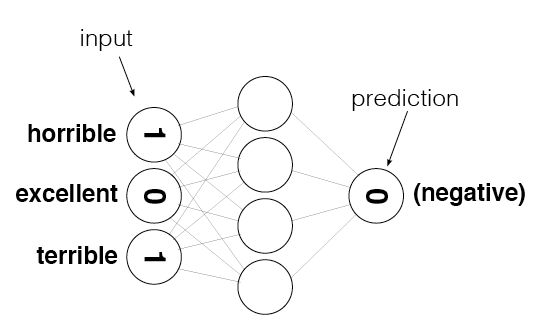

In [13]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

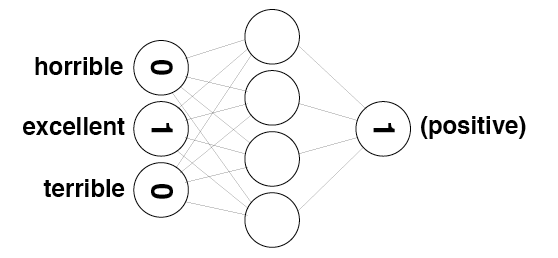

In [14]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

In [15]:
from itertools import chain

words_list = [x.split() for x in reviews]
words_list = list(set(chain.from_iterable(words_list))) # transform to a set for uniqueness then convert back to a list

layer_0 = np.zeros(len(words_list))
print("layer_0 = {}\n\nwords_list = {}".format(layer_0, words_list))

layer_0 = [ 0.  0.  0. ...,  0.  0.  0.]

words_list = ['porshe', 'themyscira', 'lycanthropy', 'svendsen', 'gerschwin', 'superego', 'beefheart', 'fernack', 'trektng', 'wackyest', 'nearby', 'sasaki', 'recreates', 'iceholes', 'fence', 'siebenmal', 'ideologists', 'jake', 'spriggs', 'illegally', 'calvados', 'qian', 'sondheim', 'shevelove', 'affordable', 'glas', 'cannons', 'molesion', 'filmmaker', 'hunkered', 'correctable', 'referees', 'steadily', 'modesty', 'hooper', 'trumps', 'sitck', 'burkley', 'buffoonish', 'scooby', 'defiling', 'surnames', 'commanding', 'kikuno', 'pollutions', 'foetus', 'apeing', 'misguised', 'why', 'tashed', 'koshiro', 'maadri', 'dutt', 'petit', 'wished', 'splendor', 'nadji', 'rains', 'layabout', 'alanis', 'retardedness', 'adherent', 'so', 'amar', 'rene', 'laraine', 'elmo', 'licata', 'centralised', 'elsewere', 'speculating', 'geritan', 'programmatical', 'commoditisation', 'dangerfield', 'transcendental', 'superficiality', 'grinderlin', 'longhair', 'parkes', 'bookends'

In [16]:
word_index = {value: i for (i, value) in enumerate(words_list)}
word_index

{'porshe': 0,
 'themyscira': 1,
 'woodrow': 71771,
 'lycanthropy': 2,
 'svendsen': 3,
 'gerschwin': 4,
 'posers': 58464,
 'beefheart': 6,
 'trussed': 48956,
 'deterministic': 51727,
 'fernack': 7,
 'trektng': 8,
 'wackyest': 9,
 'recreates': 12,
 'iceholes': 13,
 'siebenmal': 15,
 'ideologists': 16,
 'jake': 17,
 'spriggs': 18,
 'cease': 35831,
 'illegally': 19,
 'calvados': 20,
 'qian': 21,
 'sondheim': 22,
 'shevelove': 23,
 'affordable': 24,
 'confuse': 24518,
 'glas': 25,
 'cannons': 26,
 'molesion': 27,
 'cecelia': 45457,
 'filmmaker': 28,
 'referees': 31,
 'modesty': 33,
 'godlike': 12177,
 'hooper': 34,
 'surnames': 41,
 'triviality': 61573,
 'defiling': 40,
 'buffoonish': 38,
 'scooby': 39,
 'commanding': 42,
 'confessor': 66717,
 'thimothy': 43742,
 'foetus': 45,
 'misguised': 47,
 'another': 31577,
 'gargoyle': 24524,
 'tashed': 49,
 'koshiro': 50,
 'petit': 53,
 'dutt': 52,
 'wished': 54,
 'splendor': 55,
 'djs': 71480,
 'layabout': 58,
 'adherent': 61,
 'alanis': 59,
 'reta

In [17]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent \
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split():
        if word in word_index.keys():
            layer_0[word_index[word]] += 1
    

In [18]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    return 1 if label == 'POSITIVE' else 0

In [19]:
# Tests
update_input_layer("The sleek sleek")
print(layer_0)
print(labels[0])
print(get_target_for_label(labels[0]))

[ 0.  0.  0. ...,  0.  0.  0.]
POSITIVE
1
